<a href="https://colab.research.google.com/github/timurista/data-analysis/blob/master/tesnforflow-2-notebooks/MooresLawTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow==2.2.0
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 516.2MB 29kB/s 
     |████████████████████████████████| 3.0MB 41.5MB/s 
     |████████████████████████████████| 460kB 47.7MB/s 
2.2.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-12-11 16:01:38--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-12-11 16:01:38 (33.3 MB/s) - ‘moore.csv’ saved [2302/2302]



In [4]:
data = pd.read_csv('moore.csv', header=None).values

In [5]:
x = data[:,0].reshape(-1,1)
y = data[:,1]

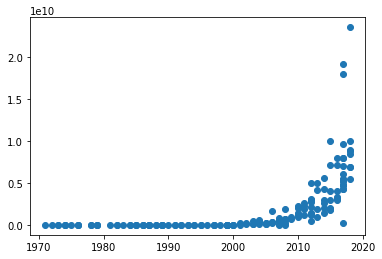

In [6]:
plt.scatter(x,y)

In [7]:
Y = np.log(y)

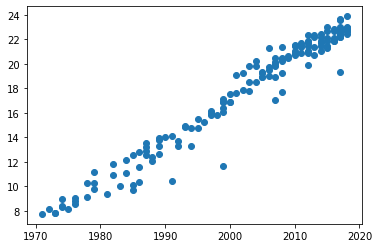

In [8]:
plt.scatter(x,Y)

In [9]:
## preprocessing X, center it

In [44]:
X = x-x.mean()

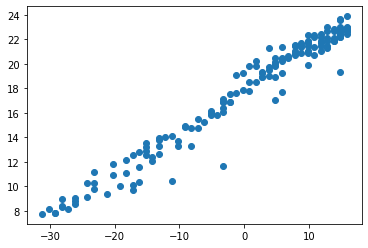

In [45]:
plt.scatter(X,Y)

In [46]:
# import keras
model = tf.keras.models.Sequential([
         tf.keras.layers.Input(shape=(1,)),
         tf.keras.layers.Dense(1)
 ])


In [47]:
model.compile(tf.optimizers.SGD(0.001, 0.9),loss='mse')

In [48]:
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  else:
    return 0.001

In [49]:
schduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [50]:
# Train the model
r = model.fit(X, Y, epochs=200, callbacks=[schduler])


Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 496.7499 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 363.2292 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 327.4923 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 262.5374 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 173.9621 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 146.1670 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 105.9230 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 76.3526 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 58.1645 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 48.8169 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 

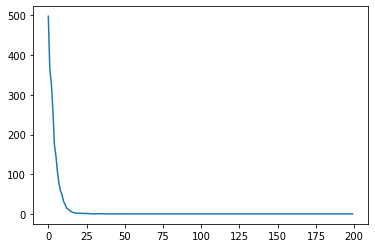

In [51]:
# plot the loss
plt.plot(r.history['loss'], label='loss')

In [52]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.34017104]], dtype=float32), array([17.756832], dtype=float32)]


In [53]:
# slope of the line
a = model.layers[0].get_weights()[0][0,0]
a

0.34017104

In [54]:
# intercept of the line
b = model.layers[0].get_weights()[1][0]
b

17.756832

In [55]:
# our original formula
# exponential growth
# to get r we raise e to the power of a to reverse log
import math
r = math.pow(np.e,a)
r

1.405187912092903

In [56]:
# Time to double
# note the value here is appx 2
np.log(2) / a

2.037643129129196

# Part 2: Predict Linear Regression

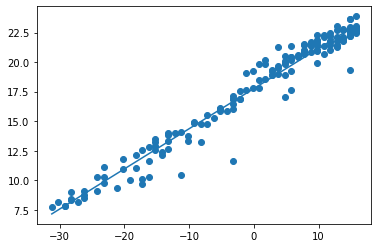

In [57]:
Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat)

In [60]:
# Manual Calculation
w,b = model.layers[0].get_weights()
# Reshape to 2d
X = X.reshape(-1, 1)

Yhat2 = (X.dot(w) + b).flatten() # nlength flatten
print(np.mean(Yhat - Yhat2))
np.allclose(Yhat, Yhat2)

3.532124800598717e-08


True

# Part 2: Making predictions

$$r = e^a$$
$$log(2) / a$$


In [30]:
# Load in the data
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
type(data)
# normally we would put all of our imports at the top
# but this lets us tell a story
from sklearn.model_selection import train_test_split


# split the data into train and test sets
# this lets us simulate how our model will perform in the future
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [32]:
# Scale the data
# you'll learn why scaling is needed in a later course
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))


Epoch 1/100
12/12 [==============================] - 0s 9ms/step - loss: 0.5938 - accuracy: 0.6903 - val_loss: 0.5220 - val_accuracy: 0.7553
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5330 - accuracy: 0.7848 - val_loss: 0.4718 - val_accuracy: 0.8457
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4836 - accuracy: 0.8346 - val_loss: 0.4303 - val_accuracy: 0.8830
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.4424 - accuracy: 0.8661 - val_loss: 0.3962 - val_accuracy: 0.9043
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4084 - accuracy: 0.8819 - val_loss: 0.3682 - val_accuracy: 0.9149
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3802 - accuracy: 0.8924 - val_loss: 0.3445 - val_accuracy: 0.9202
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3566 - accuracy: 0.9003 - val_loss: 0.3241 - val_accuracy: 0.9202
Epoch 8/100
1

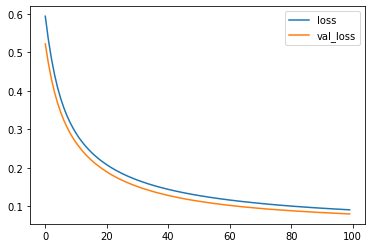

In [34]:
# Plot what's returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

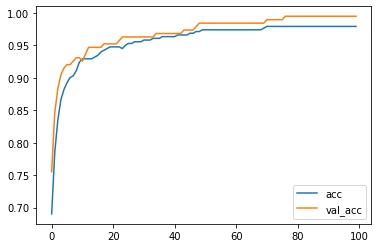

In [35]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [36]:
# Logistic Regression sigmoid
P = model.predict(X_test)
P = np.round(P).flatten()
print(P)

[0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0.
 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1.
 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0.
 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1.]


In [37]:
# Calculate accuracy
# == on array does element wise comparison
print("Manually calculated accuracy", np.mean(P == y_test))
print("Evaluate Output", model.evaluate(X_test, y_test))


Manually calculated accuracy 0.9946808510638298
6/6 [==============================] - 0s 2ms/step - loss: 0.0801 - accuracy: 0.9947
Evaluate Output [0.08010474592447281, 0.9946808218955994]
